In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Infographics: https://www.slideshare.net/f2005636/rohit-garg-iimraipurinfo
Writeup: https://www.slideshare.net/f2005636/rohit-garg-iimraipurmethod-35713255

In [3]:
df= pd.read_excel('purchase data.xlsx', sheet_name='data')
df.drop(columns='Unnamed: 0',inplace=True)

In [260]:
df.head()
## Here we have loaded the given data.
## Now we would go ahead and work with this data and try to draw out inferences and insights from the same. 

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [261]:
df.shape

(58693, 24)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  int64  
 3   Brand              58693 non-null  int64  
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  int64  
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  int64  
 13  Promotion_2        58693 non-null  int64  
 14  Promotion_3        58693 non-null  int64  
 15  Promotion_4        58693 non-null  int64  
 16  Promotion_5        586

In [263]:
## Here we note that there are multiple inccorect dtypes in terms of 
## analysing the data and trying to learn trends from visualization. 
## Thus we would be changing the dtypes of a few columns, w.r.t the data definition
## And then continue with our analysis.

In [264]:
df.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [265]:
df["Incidence"]=df["Incidence"].astype("object")

In [266]:
df["Brand"]=df["Brand"].astype("object")
df["Last_Inc_Brand"]=df["Last_Inc_Brand"].astype("object")
df["Promotion_1"]=df["Promotion_1"].astype("object")
df["Promotion_2"]=df["Promotion_2"].astype("object")
df["Promotion_3"]=df["Promotion_3"].astype("object")
df["Promotion_4"]=df["Promotion_4"].astype("object")
df["Promotion_5"]=df["Promotion_5"].astype("object")
df["Sex"]=df["Sex"].astype("object")
df["Marital status"]=df["Marital status"].astype("object")
df["Education"]=df["Education"].astype("object")
df["Occupation"]=df["Occupation"].astype("object")
df["Settlement size"]=df["Settlement size"].astype("object")


In [267]:
df.info()

## Thus we have succesfull changed the dtypes of all the actual categorical columns into object. 
## Now we would go ahead with univariate analysis and bivariate analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  object 
 3   Brand              58693 non-null  object 
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  object 
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  object 
 13  Promotion_2        58693 non-null  object 
 14  Promotion_3        58693 non-null  object 
 15  Promotion_4        58693 non-null  object 
 16  Promotion_5        586

In [5]:
num=df.select_dtypes(include=np.number)
cat=df.select_dtypes(include="object")

In [269]:
num.head()

,ID,Day,Quantity,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Age,Income
0,200000001,1,0,0,1.59,1.87,2.01,2.09,2.66,47,110866
1,200000001,11,0,0,1.51,1.89,1.99,2.09,2.66,47,110866
2,200000001,12,0,0,1.51,1.89,1.99,2.09,2.66,47,110866
3,200000001,16,0,0,1.52,1.89,1.98,2.09,2.66,47,110866
4,200000001,18,0,0,1.52,1.89,1.99,2.09,2.66,47,110866


In [270]:
cat.head()

,Incidence,Brand,Last_Inc_Brand,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Education,Occupation,Settlement size
0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,1,1,0


In [271]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,58693.0,2.000003e+08,144.316677,2.000000e+08,2.000001e+08,2.000003e+08,2.000004e+08,2.000005e+08
Day,58693.0,3.494311e+02,212.045058,1.000000e+00,1.610000e+02,3.430000e+02,5.300000e+02,7.300000e+02
Quantity,58693.0,6.919735e-01,1.498734,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01
Last_Inc_Quantity,58693.0,2.480705e-01,0.431897,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Price_1,58693.0,1.392074e+00,0.091139,1.100000e+00,1.340000e+00,1.390000e+00,1.470000e+00,1.590000e+00
Price_2,58693.0,1.780999e+00,0.170868,1.260000e+00,1.580000e+00,1.880000e+00,1.890000e+00,1.900000e+00
Price_3,58693.0,2.006789e+00,0.046867,1.870000e+00,1.970000e+00,2.010000e+00,2.060000e+00,2.140000e+00
Price_4,58693.0,2.159945e+00,0.089825,1.760000e+00,2.120000e+00,2.170000e+00,2.240000e+00,2.260000e+00
Price_5,58693.0,2.654798e+00,0.098272,2.110000e+00,2.630000e+00,2.670000e+00,2.700000e+00,2.800000e+00
Age,58693.0,3.879396e+01,12.052447,1.800000e+01,3.000000e+01,3.600000e+01,4.600000e+01,7.500000e+01


In [272]:
cat.describe().T

,count,unique,top,freq
Incidence,58693,2,0,44055
Brand,58693,6,0,44055
Last_Inc_Brand,58693,6,0,44133
Promotion_1,58693,2,0,38512
Promotion_2,58693,2,0,40169
Promotion_3,58693,2,0,56181
Promotion_4,58693,2,0,51776
Promotion_5,58693,2,0,56588
Sex,58693,2,0,36044
Marital status,58693,2,0,35620


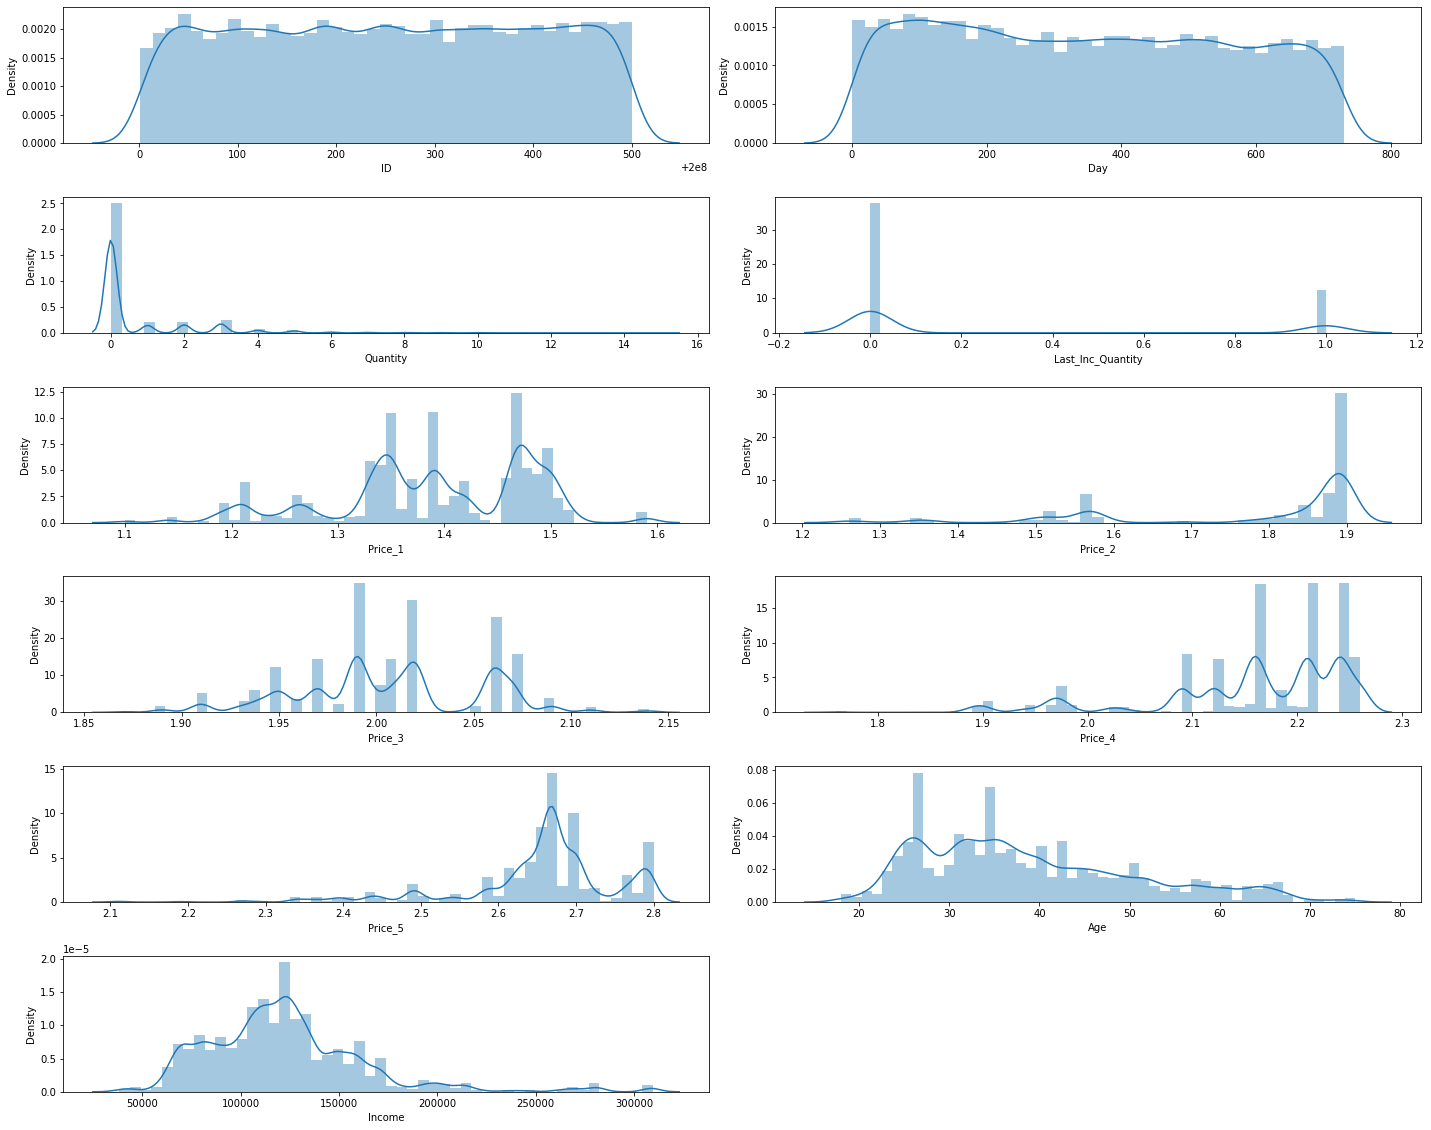

In [273]:
n_rows=7
n_cols=2
counter=1

plt.rcParams['figure.figsize']=[20,18]
for i in num:
    plt.subplot(n_rows,n_cols,counter)
    sns.distplot(num.loc[:,i])
    counter+=1
    
plt.tight_layout()
plt.show()

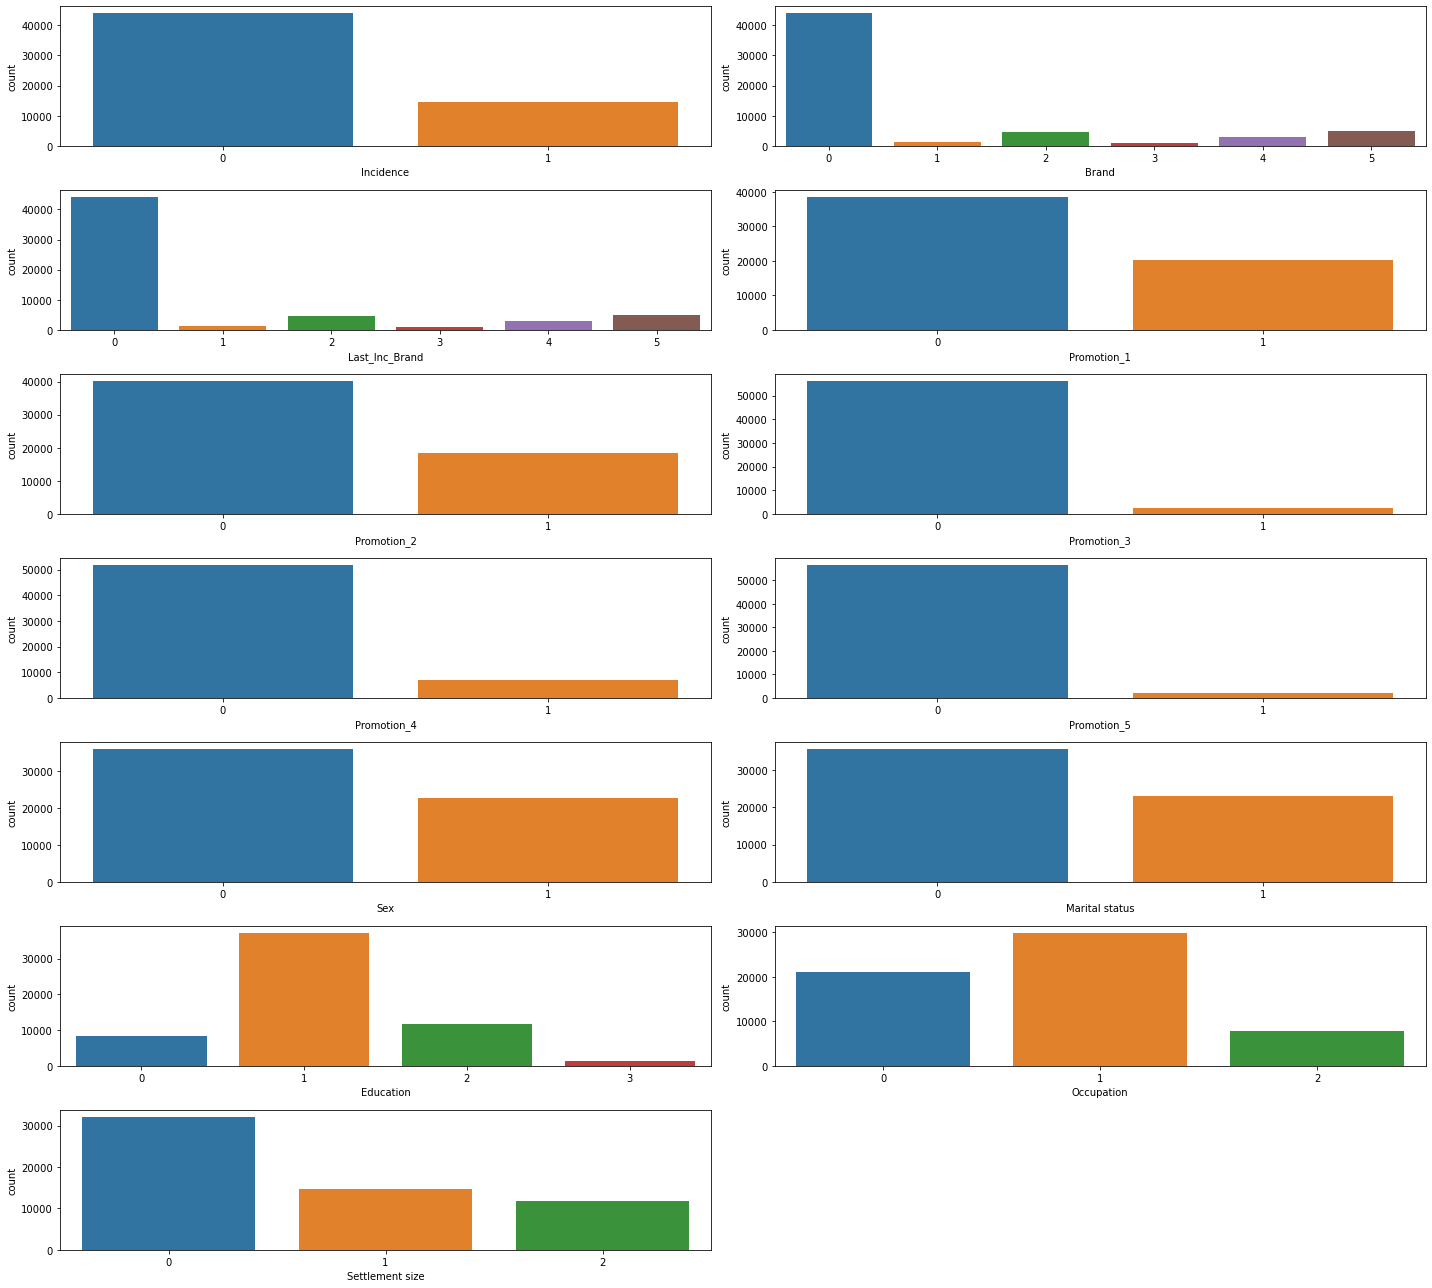

In [274]:
n_rows=7
n_cols=2
counter=1

plt.rcParams['figure.figsize']=[20,18]
for i in cat:
    plt.subplot(n_rows,n_cols,counter)
    sns.countplot(cat.loc[:,i])
    counter+=1
    
plt.tight_layout()
plt.show()

In [275]:
##Inferences to be written here. 

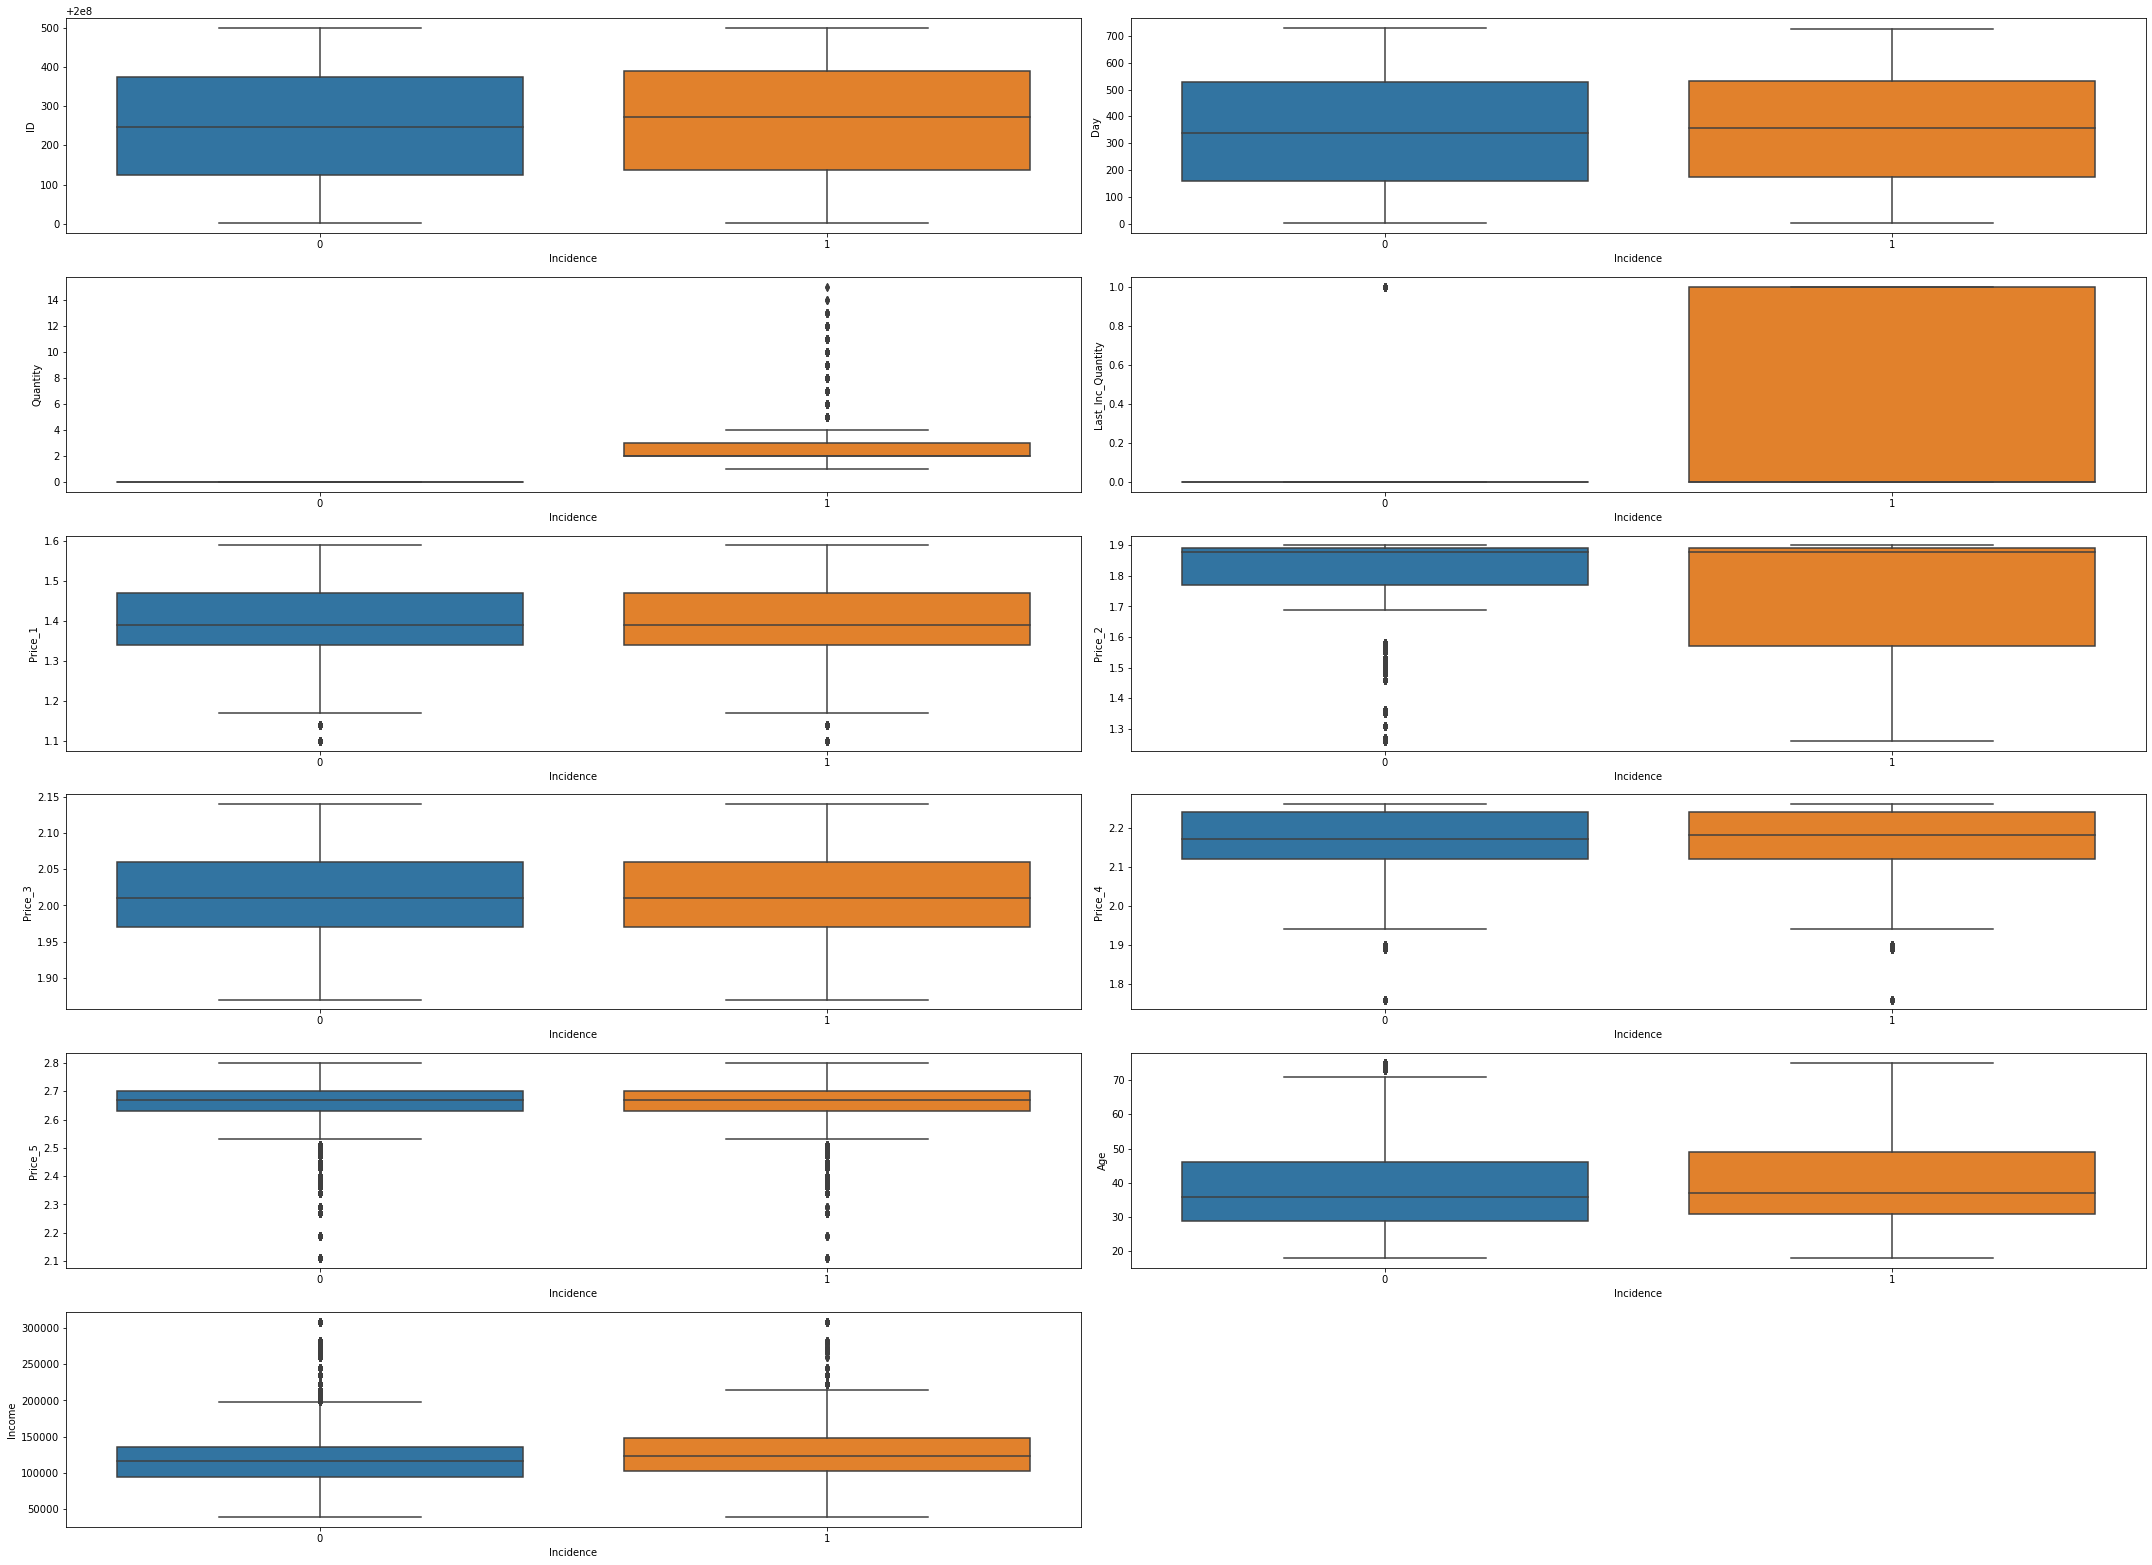

In [276]:
## Bivariate analysis. 
## Since incedence is the target variable, we have shown the relationship of incidence with our numerical features.
n_rows=7
n_cols=2
counter=1

plt.rcParams['figure.figsize']=[30,25]
for i in num:
    plt.subplot(n_rows,n_cols,counter)
    sns.boxplot(y=num.loc[:,i], data=df, x="Incidence")
    counter+=1
    
plt.tight_layout()
plt.show()

In [277]:
cat.columns

Index(['Incidence', 'Brand', 'Last_Inc_Brand', 'Promotion_1', 'Promotion_2',
       'Promotion_3', 'Promotion_4', 'Promotion_5', 'Sex', 'Marital status',
       'Education', 'Occupation', 'Settlement size'],
      dtype='object')

In [278]:
## Bivariate analysis of categorical columns w.r.t. the target variable.

In [9]:
plt.rcParams['figure.figsize']=[10,5]
for i in cat:
    pd.crosstab(df[i],df.Incidence).plot(kind='bar')
    counter=1
    
plt.tight_layout()
plt.show()

<Figure size 720x360 with 0 Axes>

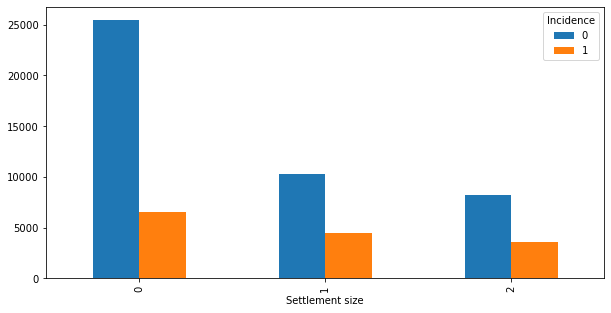

In [10]:
pd.crosstab(df["Settlement size"], df["Incidence"]).plot(kind="bar",)
plt.show()


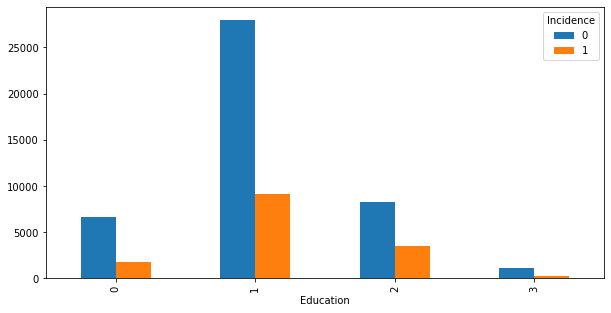

In [11]:
pd.crosstab(df["Education"], df["Incidence"]).plot(kind="bar",)
plt.show()


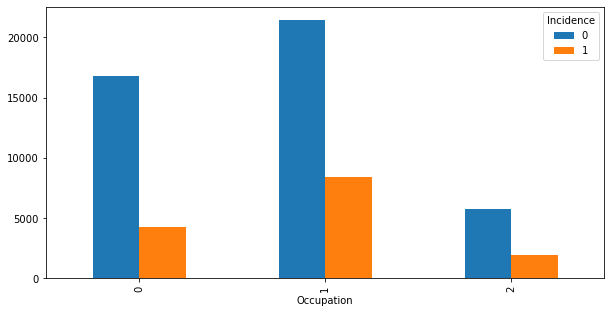

In [14]:
pd.crosstab(df["Occupation"], df["Incidence"]).plot(kind="bar",)
plt.show()


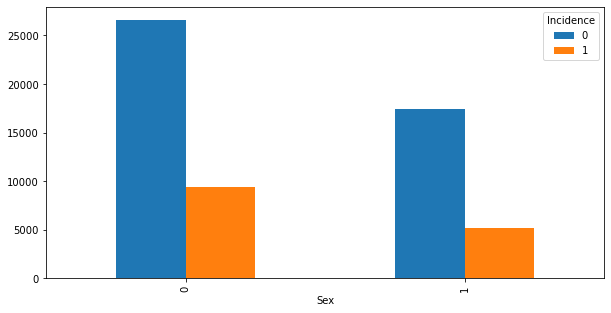

In [13]:
pd.crosstab(df["Sex"], df["Incidence"]).plot(kind="bar",)
plt.show()


In [ ]:
## Inferences drawn out. 

Educational qualifications of out most frequent buyers is either high school or university.
occupation, employeed being the highest and unemployed being the topmost. 
more male customers than female



In [280]:
df1=df.copy()

In [281]:
## changing all the categorical columns into numerical columns for modelling. 

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58693 entries, 0 to 58692
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58693 non-null  int64  
 1   Day                58693 non-null  int64  
 2   Incidence          58693 non-null  object 
 3   Brand              58693 non-null  object 
 4   Quantity           58693 non-null  int64  
 5   Last_Inc_Brand     58693 non-null  object 
 6   Last_Inc_Quantity  58693 non-null  int64  
 7   Price_1            58693 non-null  float64
 8   Price_2            58693 non-null  float64
 9   Price_3            58693 non-null  float64
 10  Price_4            58693 non-null  float64
 11  Price_5            58693 non-null  float64
 12  Promotion_1        58693 non-null  object 
 13  Promotion_2        58693 non-null  object 
 14  Promotion_3        58693 non-null  object 
 15  Promotion_4        58693 non-null  object 
 16  Promotion_5        586

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
df1["Incidence"]=df1["Incidence"].astype(int)
df1["Brand"]=df1["Brand"].astype(int)
df1["Last_Inc_Brand"]=df1["Last_Inc_Brand"].astype(int)
df1["Promotion_1"]=df1["Promotion_1"].astype(int)
df1["Promotion_2"]=df1["Promotion_2"].astype(int)
df1["Promotion_3"]=df1["Promotion_3"].astype(int)
df1["Promotion_4"]=df1["Promotion_4"].astype(int)
df1["Promotion_5"]=df1["Promotion_5"].astype(int)
df1["Sex"]=df1["Sex"].astype(int)
df1["Marital status"]=df1["Marital status"].astype(int)
df1["Education"]=df1["Education"].astype(int)
df1["Occupation"]=df1["Occupation"].astype(int)
df1["Settlement size"]=df1["Settlement size"].astype(int)


In [284]:
y=df1["Incidence"]
x=df1.drop(columns="Incidence")

In [285]:
x.shape,y.shape

((58693, 23), (58693,))

In [286]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.7,random_state=420)

In [287]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((41085, 23), (17608, 23), (41085,), (17608,))

In [288]:
from lightgbm import LGBMClassifier


In [289]:
lgb=LGBMClassifier(boosting_type='dart',n_estimators=494,learning_rate=0.15,
                   objective='binary',scale_pos_weight=2.5,max_depth=5,
                   reg_alpha=0.1,reg_lambda=0.1,nthread=4,colsample_bytree=0.8)


In [290]:
model=lgb.fit(X_train,Y_train)

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1


In [291]:
from lightgbm import LGBMClassifier, plot_importance


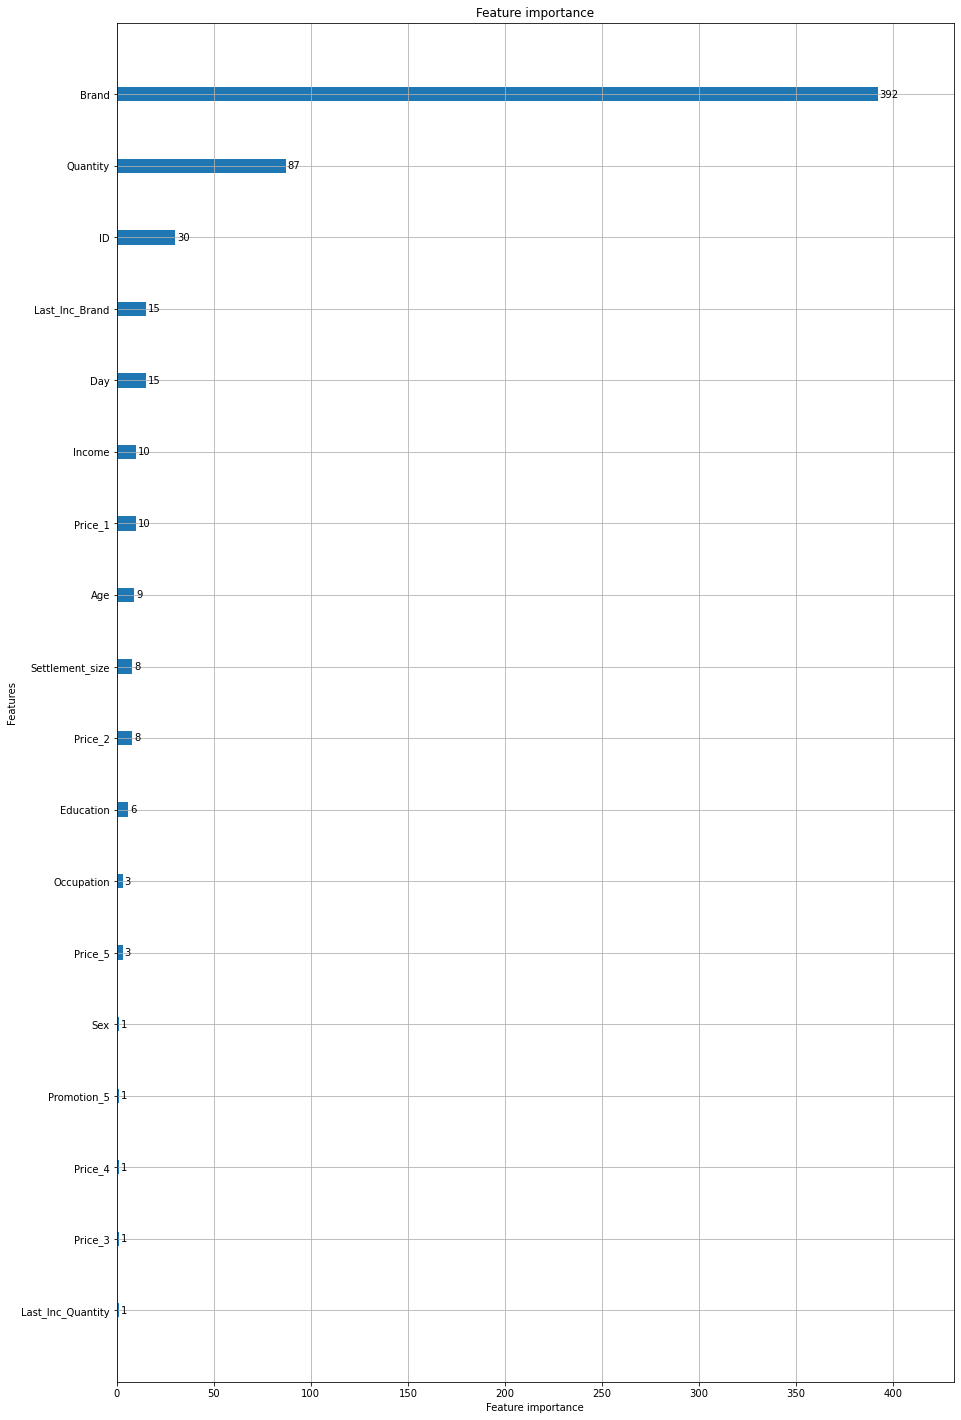

In [292]:
plot_importance(model,figsize=(15, 25))
plt.show()

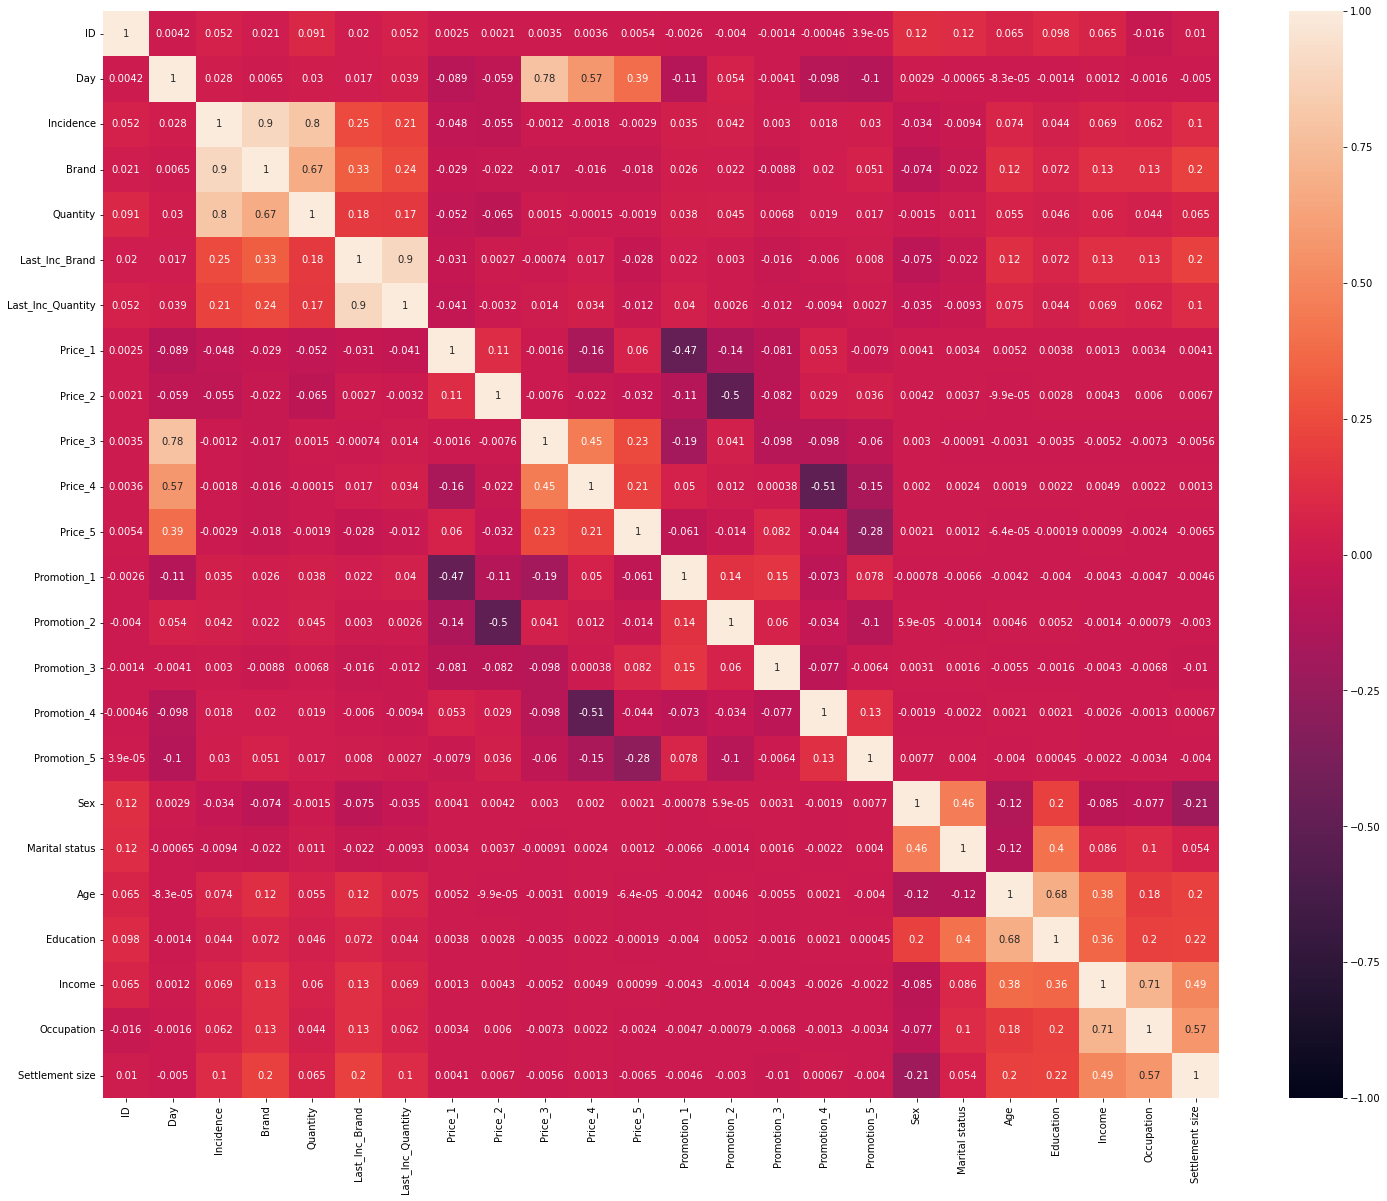

In [293]:
plt.rcParams["figure.figsize"]=[25,20]
sns.heatmap(df1.corr(),annot=True, vmax=1,vmin=-1)
plt.show()

In [299]:
Y_pred = model.predict(X_test)


In [300]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,cohen_kappa_score,classification_report,recall_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [305]:
def classication_metrix(test,pred):
    print("Accuracy score \n", accuracy_score(test,pred))
    print("Precision \n",  precision_score(test,pred))
    print("Recall \n", recall_score(test,pred))
    print("F1-Score \n", f1_score(test,pred))
    print("Cohen-kappa \n", cohen_kappa_score(test,pred))
    print("Classification Report \n", classification_report(test,pred))

In [306]:
classication_metrix(Y_test,Y_pred)

Accuracy score 
 1.0
Precision 
 1.0
Recall 
 1.0
F1-Score 
 1.0
Cohen-kappa 
 1.0
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13173
           1       1.00      1.00      1.00      4435

    accuracy                           1.00     17608
   macro avg       1.00      1.00      1.00     17608
weighted avg       1.00      1.00      1.00     17608



In [375]:
q=df.Day

In [374]:
## Now since we have noted that Day column is acting as an important asset, we would further segregate it to draw insights and
## Learn patterns
def segregate(x):
    if x%7==0:
        return 7
    else:
        return x%7

In [379]:
df.Day=df.Day.apply(segregate)

In [387]:
file_name = 'Final_prep_data.xlsx'
  
# saving the excel 
df.to_excel(file_name) 